# import

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import matplotlib.pyplot as plt
import numpy as np

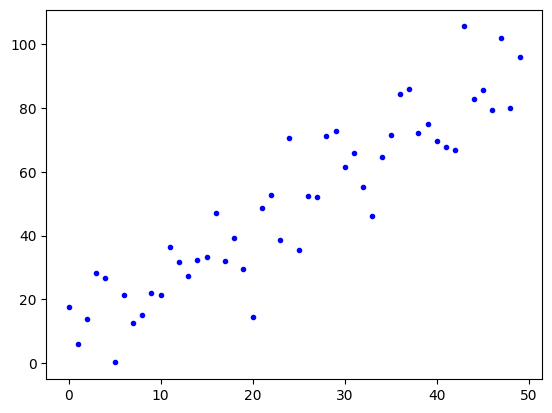

In [2]:
np.random.seed(0)

m = 50
X = np.arange(m)
y = 2*X + np.random.randn(m) * 10

plt.plot(X, y, 'b.')

tensor(-0.0075, grad_fn=<UnbindBackward0>) tensor(0.5364, grad_fn=<UnbindBackward0>)
epoch:0, cost:3230.314697265625
epoch:20, cost:125.01676940917969
epoch:40, cost:124.69837951660156
epoch:60, cost:124.3864974975586
epoch:80, cost:124.08097839355469
epoch:100, cost:123.78169250488281


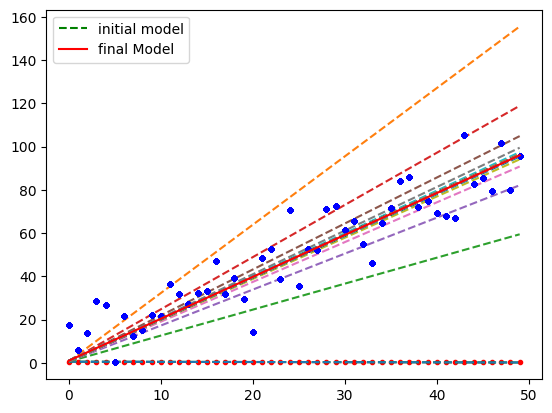

In [3]:
torch.manual_seed(0)

model = nn.Linear(in_features=1, out_features=1)
W, b = nn.utils.parameters_to_vector(model.parameters())
print(W, b)
y_pred = (torch.tensor(X) * W + b).detach().numpy()
plt.plot(X, y_pred, 'r.')
y_pred = model(torch.tensor(X.reshape(-1, 1), dtype=torch.float)).detach().numpy()
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'g--', label='initial model')

opt = torch.optim.SGD(model.parameters(), lr=0.001)
for epoch in range(101):
  y_pred = model(torch.tensor(X.reshape(-1, 1), dtype=torch.float))
  cost = f.mse_loss(y_pred, torch.FloatTensor(y.reshape(-1,1)))
  opt.zero_grad()
  cost.backward()
  opt.step()
  if epoch%20==0:
    print(f'epoch:{epoch}, cost:{cost}')
  plt.plot(X, y, 'b.')
  plt.plot(X, y_pred.detach().numpy(), '--')
plt.plot(X, y_pred.detach().numpy(), 'r-', label='final Model')
plt.legend();

# Sequential

epoch:0, cost:3230.314697265625
epoch:20, cost:125.01676940917969
epoch:40, cost:124.69837951660156
epoch:60, cost:124.3864974975586
epoch:80, cost:124.08097839355469
epoch:100, cost:123.78169250488281


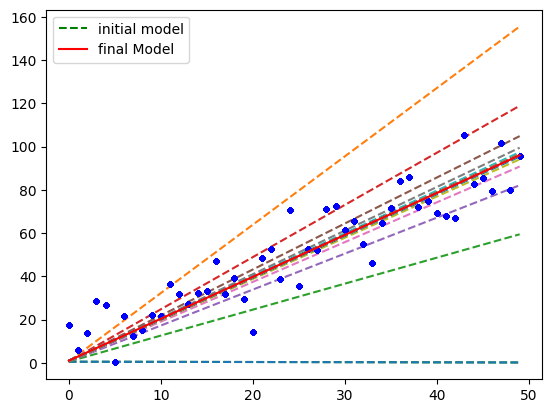

In [4]:
torch.manual_seed(0)

model = nn.Sequential(
    nn.Linear(in_features=1, out_features=1)
)
y_pred = model(torch.tensor(X.reshape(-1, 1), dtype=torch.float)).detach().numpy()
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'g--', label='initial model')

opt = torch.optim.SGD(model.parameters(), lr=0.001)
for epoch in range(101):
  y_pred = model(torch.tensor(X.reshape(-1, 1), dtype=torch.float))
  cost = f.mse_loss(y_pred, torch.FloatTensor(y.reshape(-1,1)))
  opt.zero_grad()
  cost.backward()
  opt.step()
  if epoch%20==0:
    print(f'epoch:{epoch}, cost:{cost}')
  plt.plot(X, y, 'b.')
  plt.plot(X, y_pred.detach().numpy(), '--')
plt.plot(X, y_pred.detach().numpy(), 'r-', label='final Model')
plt.legend();

# 상속

epoch:0, cost:6532.18017578125
epoch:20, cost:130.3582000732422
epoch:40, cost:129.9309539794922
epoch:60, cost:129.51239013671875
epoch:80, cost:129.1024169921875
epoch:100, cost:128.70077514648438


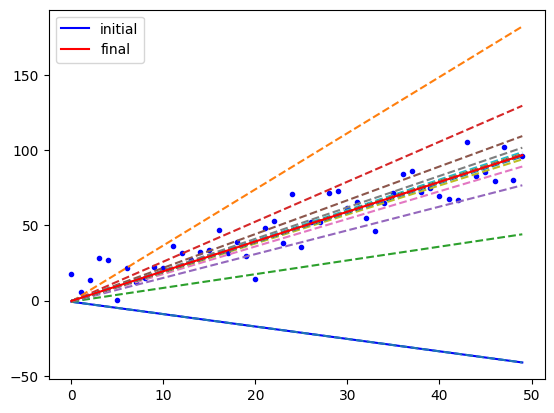

In [5]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, X):
    return self.linear(X)

model = LinearRegression()
opt = torch.optim.SGD(model.parameters(), lr=0.001)
plt.plot(X, y, 'b.')
plt.plot(X, model(torch.FloatTensor(X.reshape(-1, 1))).detach().numpy(), 'b-', label='initial')
for epoch in range(101):
  y_pred = model(torch.FloatTensor(X.reshape(-1, 1)))
  cost = f.mse_loss(y_pred, torch.FloatTensor(y.reshape(-1,1)))
  opt.zero_grad()
  cost.backward()
  opt.step()
  if epoch%20==0:
    print(f'epoch:{epoch}, cost:{cost}')
  plt.plot(X, y_pred.detach().numpy(), '--')
plt.plot(X,y_pred.detach().numpy(), 'r-', label='final')
plt.legend();

# TensorDataset, DataLoader

epch=0/101, batch=1/5, cost:2643.83251953125
epch=0/101, batch=2/5, cost:192.08743286132812
epch=0/101, batch=3/5, cost:74.68750762939453
epch=0/101, batch=4/5, cost:182.3809051513672
epch=0/101, batch=5/5, cost:173.64317321777344
epch=1/101, batch=1/5, cost:169.91856384277344
epch=1/101, batch=2/5, cost:150.11697387695312
epch=1/101, batch=3/5, cost:156.74147033691406
epch=1/101, batch=4/5, cost:373.67230224609375
epch=1/101, batch=5/5, cost:616.0598754882812
epch=2/101, batch=1/5, cost:798.6188354492188
epch=2/101, batch=2/5, cost:580.8033447265625
epch=2/101, batch=3/5, cost:352.87811279296875
epch=2/101, batch=4/5, cost:262.61724853515625
epch=2/101, batch=5/5, cost:447.43792724609375
epch=3/101, batch=1/5, cost:342.5096435546875
epch=3/101, batch=2/5, cost:136.19265747070312
epch=3/101, batch=3/5, cost:141.60952758789062
epch=3/101, batch=4/5, cost:113.8992919921875
epch=3/101, batch=5/5, cost:90.34867095947266
epch=4/101, batch=1/5, cost:188.7535400390625
epch=4/101, batch=2/5, c

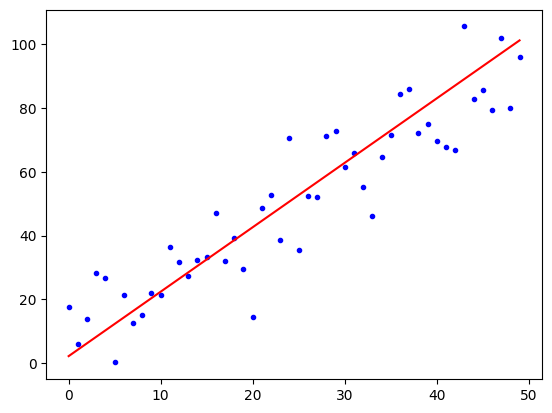

In [6]:
from torch.utils.data import TensorDataset, DataLoader

np.random.seed(0)
m = 50
X = np.arange(m)
y = 2*X + np.random.randn(m) * 10
plt.plot(X, y, 'b.')

dataset = TensorDataset(torch.FloatTensor(X.reshape(-1,1)), torch.FloatTensor(y.reshape(-1,1)))
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

model = LinearRegression()
opt = torch.optim.SGD(model.parameters(), lr=0.001)
epochs = 101
for epoch in range(epochs):
  for batch_idx, samples in enumerate(dataloader):
    X_train, y_train = samples
    y_pred = model(X_train)
    cost = f.mse_loss(y_pred, y_train)
    opt.zero_grad()
    cost.backward()
    opt.step()
    print(f'epch={epoch}/{epochs}, batch={batch_idx+1}/{len(dataloader)}, cost:{cost}')
plt.plot(X, model(torch.FloatTensor(X.reshape(-1, 1))).detach().numpy(), 'r-')

# custom dataset

In [7]:
class CustomDS(torch.utils.data.Dataset):
  def __init__(self):
    self.m = 50
    self.X = np.arange(self.m)
    self.y = self.X * 2 + np.random.randn(self.m) * 10

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    X = torch.FloatTensor(self.X.reshape(-1, 1)[idx])
    y = torch.FloatTensor(self.y.reshape(-1,1)[idx])
    return X, y

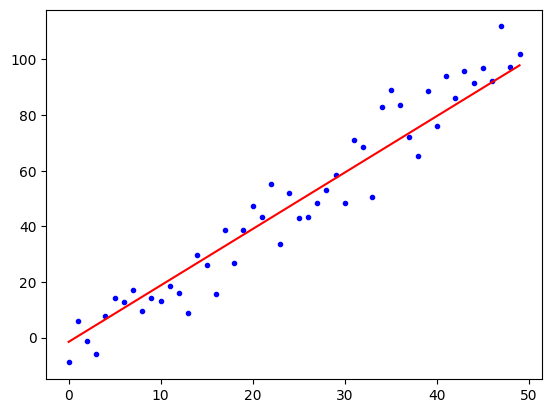

In [8]:
dataset = CustomDS()
loader = DataLoader(dataset, batch_size=10, shuffle=True)

model = torch.nn.Linear(1, 1)
opt = torch.optim.SGD(model.parameters(), lr=0.001)
for epoch in range(101):
  for batch_idx, samples in enumerate(loader):
    X_train, y_train = samples
    y_pred = model(X_train)
    cost = f.mse_loss(y_pred, y_train)
    opt.zero_grad()
    cost.backward()
    opt.step()
plt.plot(dataset.X, dataset.y, 'b.')
plt.plot(dataset.X, model(torch.FloatTensor(dataset.X.reshape(-1,1))).detach().numpy(), 'r-')

# 비선형 회귀

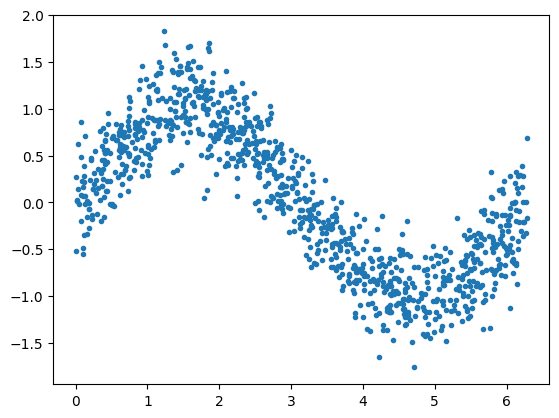

In [9]:
n = 1000
seed = 0
np.random.seed(seed)

X = np.random.uniform(0, 2*np.pi, (n,))
np.random.shuffle(X)
y = np.sin(X) + np.random.randn(n) * 0.3
plt.plot(X, y, '.')

# 단층 모델

epoch=0, cost:0.9382492303848267
epoch=20, cost:0.2604300081729889
epoch=40, cost:0.39943766593933105
epoch=60, cost:0.28444018959999084
epoch=80, cost:0.17429187893867493
epoch=100, cost:0.2033800184726715
epoch=120, cost:0.2498287856578827
epoch=140, cost:0.21807043254375458
epoch=160, cost:0.3765758275985718
epoch=180, cost:0.3544802665710449
epoch=200, cost:0.12221985310316086


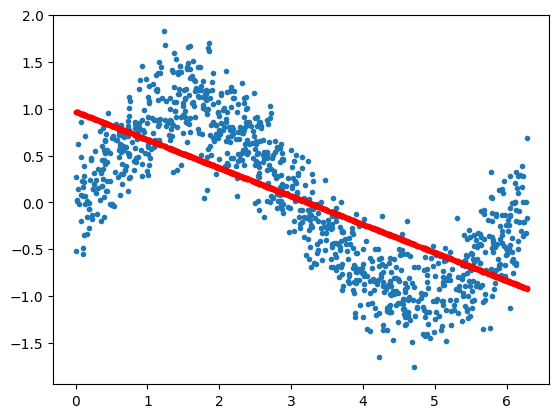

In [10]:
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(0)

dataset = TensorDataset(torch.FloatTensor(X.reshape(-1,1)), torch.FloatTensor(y.reshape(-1,1)))
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

model = nn.Sequential(
    nn.Linear(in_features=1, out_features=1)
)

opt = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()
for epoch in range(201):
  for batch_idx, (X_train, y_train) in enumerate(dataloader):
    y_pred = model(X_train)
    cost = criterion(y_pred, y_train)
    opt.zero_grad()
    cost.backward()
    opt.step()
  if epoch%20==0:
    print(f'epoch={epoch}, cost:{cost}')
plt.plot(X, y, '.')
plt.plot(X, model(dataset.tensors[0]).tolist(), 'r.');

# 다층 모델

epoch=0, cost:0.22684931755065918
epoch=20, cost:0.2464725822210312
epoch=40, cost:0.23080146312713623
epoch=60, cost:0.2320341169834137
epoch=80, cost:0.3790271282196045
epoch=100, cost:0.203292578458786
epoch=120, cost:0.4016612768173218
epoch=140, cost:0.18907566368579865
epoch=160, cost:0.5800672173500061
epoch=180, cost:0.23853421211242676
epoch=200, cost:0.49816226959228516


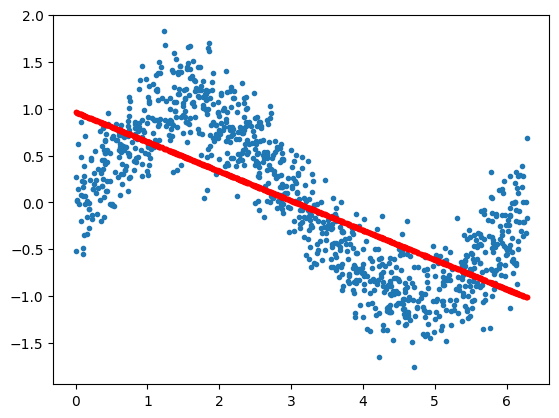

In [11]:
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(0)

dataset = TensorDataset(torch.FloatTensor(X.reshape(-1,1)), torch.FloatTensor(y.reshape(-1,1)))
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

model = nn.Sequential(
    nn.Linear(in_features=1, out_features=64),
    nn.Linear(in_features=64, out_features=32),
    nn.Linear(in_features=32, out_features=1)
)

opt = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()
for epoch in range(201):
  for batch_idx, (X_train, y_train) in enumerate(dataloader):
    y_pred = model(X_train)
    cost = criterion(y_pred, y_train)
    opt.zero_grad()
    cost.backward()
    opt.step()
  if epoch%20==0:
    print(f'epoch={epoch}, cost:{cost}')
plt.plot(X, y, '.')
plt.plot(X, model(dataset.tensors[0]).tolist(), 'r.');

# 활성화 함수

epoch=0, cost:0.2132532149553299
epoch=20, cost:0.20531943440437317
epoch=40, cost:0.0736738070845604
epoch=60, cost:0.12294760346412659
epoch=80, cost:0.09683805704116821
epoch=100, cost:0.09022948145866394
epoch=120, cost:0.13056594133377075
epoch=140, cost:0.07750067114830017
epoch=160, cost:0.1779472529888153
epoch=180, cost:0.07129938900470734
epoch=200, cost:0.21829985082149506


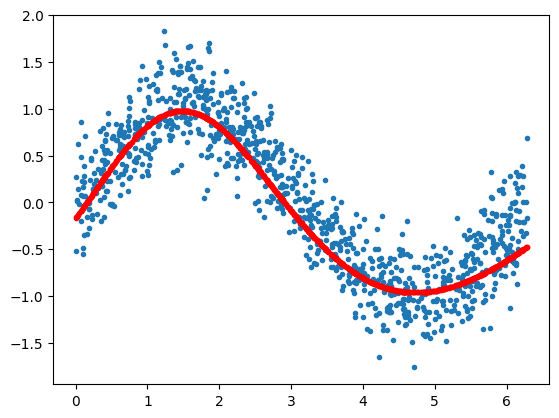

In [12]:
torch.manual_seed(0)

dataset = TensorDataset(torch.FloatTensor(X.reshape(-1,1)), torch.FloatTensor(y.reshape(-1,1)))
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

model = nn.Sequential()
model.add_module('l1', nn.Linear(1, 64))
model.add_module('sig', nn.Sigmoid())
model.add_module('l2', nn.Linear(64, 32))
model.add_module('sig', nn.Sigmoid())
model.add_module('l3', nn.Linear(32, 1))

opt = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()
for epoch in range(201):
  for batch_idx, (X_train, y_train) in enumerate(dataloader):
    y_pred = model(X_train)
    cost = criterion(y_pred, y_train)
    opt.zero_grad()
    cost.backward()
    opt.step()
  if epoch%20==0:
    print(f'epoch={epoch}, cost:{cost}')
plt.plot(X, y, '.')
plt.plot(X, model(dataset.tensors[0]).tolist(), 'r.');

# XOR

In [13]:
torch.manual_seed(0)

X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]])
y = torch.FloatTensor([[0],[1], [1], [0]] )

model = nn.Sequential(
    nn.Linear(2, 2),
    nn.Sigmoid(),
    nn.Linear(2, 1),
    nn.Sigmoid()
)

loss = torch.nn.BCELoss()
#opt = torch.optim.SGD(model.parameters(), lr=0.01)
opt = torch.optim.Adam(model.parameters(), lr=0.01)
for epoch in range(5001):
  y_pred = model(X)
  cost = loss(y_pred, y)
  opt.zero_grad()
  cost.backward()
  opt.step()
  if epoch%100==0:
    print(f'epoch={epoch}, cost={cost}')

y_proba = model(X).detach().numpy()
y_pred = (y_proba > 0.5)-0
print(y_proba, y_pred)


epoch=0, cost=0.6976591348648071
epoch=100, cost=0.6931344270706177
epoch=200, cost=0.6875973343849182
epoch=300, cost=0.4340752065181732
epoch=400, cost=0.20296049118041992
epoch=500, cost=0.11654266715049744
epoch=600, cost=0.07746805250644684
epoch=700, cost=0.056126125156879425
epoch=800, cost=0.042966097593307495
epoch=900, cost=0.03416529670357704
epoch=1000, cost=0.027931123971939087
epoch=1100, cost=0.023321745917201042
epoch=1200, cost=0.019799094647169113
epoch=1300, cost=0.017035216093063354
epoch=1400, cost=0.014819690957665443
epoch=1500, cost=0.013011891394853592
epoch=1600, cost=0.011514504440128803
epoch=1700, cost=0.010258223861455917
epoch=1800, cost=0.00919248815625906
epoch=1900, cost=0.00827966257929802
epoch=2000, cost=0.0074911583214998245
epoch=2100, cost=0.0068048955872654915
epoch=2200, cost=0.0062035247683525085
epoch=2300, cost=0.005673471838235855
epoch=2400, cost=0.005203642416745424
epoch=2500, cost=0.00478520430624485
epoch=2600, cost=0.00441083684563636

## 중간 층 출력 값 관찰

In [14]:
list(model.children())

[Linear(in_features=2, out_features=2, bias=True),
 Sigmoid(),
 Linear(in_features=2, out_features=1, bias=True),
 Sigmoid()]

In [15]:
layer1 = list(model.children())[0](X)
mid_out = list(model.children())[1](layer1).detach().numpy()
mid_out

array([[9.8866057e-01, 9.9999142e-01],
       [6.4560683e-03, 9.8086172e-01],
       [6.5960116e-03, 9.8082435e-01],
       [4.9485948e-07, 2.1959579e-02]], dtype=float32)

## 중간 층 출력 값 시각화

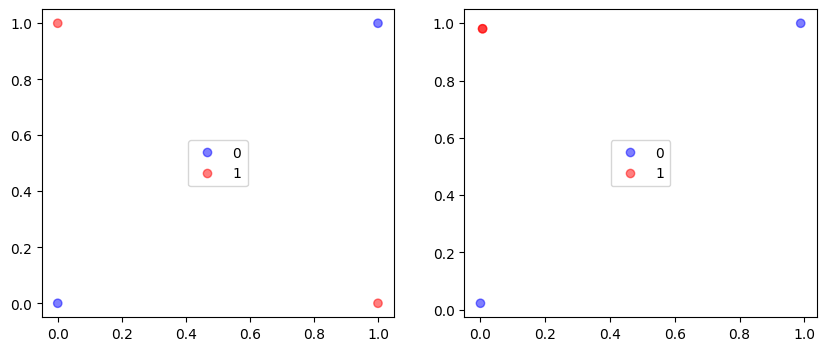

In [16]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
scatter = plt.scatter(X[:,0], X[:, 1], c=y, cmap='bwr', alpha=0.5)
plt.legend(*scatter.legend_elements(), loc='center');

plt.subplot(1,2,2)
scatter = plt.scatter(mid_out[:,0], mid_out[:, 1], c=y, cmap='bwr', alpha=0.5)
plt.legend(*scatter.legend_elements(), loc='center');

# XOR, 더 깊은 층

In [17]:
torch.manual_seed(0)

X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]])
y = torch.FloatTensor([[0],[1], [1], [0]] )

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

loss = torch.nn.BCELoss()
#opt = torch.optim.SGD(model.parameters(), lr=0.01)
opt = torch.optim.Adam(model.parameters(), lr=0.01)
for epoch in range(5001):
  y_pred = model(X)
  cost = loss(y_pred, y)
  opt.zero_grad()
  cost.backward()
  opt.step()
  if epoch%100==0:
    print(f'epoch={epoch}, cost={cost}')

y_proba = model(X).detach().numpy()
y_pred = (y_proba > 0.5)-0
print(y_proba, y_pred)


epoch=0, cost=0.6931562423706055
epoch=100, cost=0.6931470632553101
epoch=200, cost=0.48218482732772827
epoch=300, cost=0.4789798855781555
epoch=400, cost=0.47830575704574585
epoch=500, cost=0.4780053496360779
epoch=600, cost=0.47783881425857544
epoch=700, cost=0.4777344763278961
epoch=800, cost=0.47766390442848206
epoch=900, cost=0.47761356830596924
epoch=1000, cost=0.4775761365890503
epoch=1100, cost=0.47754743695259094
epoch=1200, cost=0.4775248169898987
epoch=1300, cost=0.4775066375732422
epoch=1400, cost=0.4774918556213379
epoch=1500, cost=0.47747960686683655
epoch=1600, cost=0.47746920585632324
epoch=1700, cost=0.47746050357818604
epoch=1800, cost=0.47745299339294434
epoch=1900, cost=0.47744661569595337
epoch=2000, cost=0.4774409234523773
epoch=2100, cost=0.47743597626686096
epoch=2200, cost=0.4774315655231476
epoch=2300, cost=0.4774278700351715
epoch=2400, cost=0.47742435336112976
epoch=2500, cost=0.47742128372192383
epoch=2600, cost=0.47741854190826416
epoch=2700, cost=0.477416

## ReLu 적용

In [18]:
torch.manual_seed(0)

X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]])
y = torch.FloatTensor([[0],[1], [1], [0]] )

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 1),
    nn.Sigmoid()
)

loss = torch.nn.BCELoss()
#opt = torch.optim.SGD(model.parameters(), lr=0.01)
opt = torch.optim.Adam(model.parameters(), lr=0.01)
for epoch in range(5001):
  y_pred = model(X)
  cost = loss(y_pred, y)
  opt.zero_grad()
  cost.backward()
  opt.step()
  if epoch%100==0:
    print(f'epoch={epoch}, cost={cost}')

model.eval() #추론 모드
y_proba = model(X).detach().numpy()
y_pred = (y_proba > 0.5)-0
print(y_proba, y_pred)
acc = np.mean(y.numpy()==y_pred)
print(f'accuracy:{acc}')

epoch=0, cost=0.6958187818527222
epoch=100, cost=6.814973829705195e-08
epoch=200, cost=6.273680241974944e-08
epoch=300, cost=3.252954527965812e-08
epoch=400, cost=3.198132247916874e-08
epoch=500, cost=3.136542758852556e-08
epoch=600, cost=3.0692937968979095e-08
epoch=700, cost=2.997326475906448e-08
epoch=800, cost=2.9212399610401008e-08
epoch=900, cost=2.8418170927579922e-08
epoch=1000, cost=2.7594037277367534e-08
epoch=1100, cost=2.6748104176022025e-08
epoch=1200, cost=2.588936354186444e-08
epoch=1300, cost=2.501864670989562e-08
epoch=1400, cost=2.4141732168914132e-08
epoch=1500, cost=2.326242842798365e-08
epoch=1600, cost=2.2385886921938436e-08
epoch=1700, cost=2.151580424936128e-08
epoch=1800, cost=2.0654352894666772e-08
epoch=1900, cost=1.980448693927883e-08
epoch=2000, cost=1.8970839121834615e-08
epoch=2100, cost=1.815308792174619e-08
epoch=2200, cost=1.7350755499023762e-08
epoch=2300, cost=1.6571393146591618e-08
epoch=2400, cost=1.5811137288324062e-08
epoch=2500, cost=1.507316227